# **Internship on "Full Stack Data Science" at InfraBIM Techno Solutions**

**DS-09**: **Project -HOUSE PRICE PREDICTION**

**Internship Reg. No** .:2033

**Name**:T.ANUSHA

**Date**:13/01/2023

**Other Team Members**: (Reg.No. - Name)

1.2031-K.KARNIKA

2.2032-O.AKANKSHA

3.1096-S.TRIVENI REDDY

**House_Price_Prediction**

1. Importing the required packages 

In [1]:
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

# import ML Libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, log_loss, classification_report, mean_squared_error, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

# import ML Libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, log_loss, classification_report, mean_squared_error, mean_absolute_error

# from sklearn.feature_selection import RFE

In [2]:
# import warnings
import warnings
warnings.filterwarnings('ignore')


2. Load Dataset

In [3]:
#import House price dataset
df=pd.read_csv("House_Price_Prediction.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
#rows and columns
print(df.shape)

(545, 13)


3. Exploratory Data Analysis (EDA) 

In [5]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
#shows top 5 rows
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
#shows last 5 rows
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [8]:
#keep first row and remove other duplicate rows of the data
df=df.drop_duplicates(keep='first')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [9]:
#finding total no of rows which are missing in a column 
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
#let us convert the text data into numeric with labelEncoder
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()

In [12]:
#applying encoder on textual columns
df['mainroad_n']=le.fit_transform(df['mainroad'])
df['guestroom_n']=le.fit_transform(df['guestroom'])
df['basement_n']=le.fit_transform(df['basement'])
df['hotwaterheating_n']=le.fit_transform(df['hotwaterheating'])
df['airconditioning_n']=le.fit_transform(df['airconditioning'])
df['prefarea_n']=le.fit_transform(df['prefarea'])
df['furnishingstatus_n']=le.fit_transform(df['furnishingstatus'])
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_n,guestroom_n,basement_n,hotwaterheating_n,airconditioning_n,prefarea_n,furnishingstatus_n
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1,0,0,0,1,1,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1,0,0,0,1,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1,0,1,0,0,1,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1,0,1,0,1,1,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,1,0,1,0,0,0,2
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,1,0,0,0,0,0,2
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,0,0,0,0,0,0,0


In [13]:
#deleting cols with labels(or strings)
df=df.drop(['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'],axis='columns')

In [14]:
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_n,guestroom_n,basement_n,hotwaterheating_n,airconditioning_n,prefarea_n,furnishingstatus_n
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'stories'}>,
        <AxesSubplot:title={'center':'parking'}>,
        <AxesSubplot:title={'center':'mainroad_n'}>,
        <AxesSubplot:title={'center':'guestroom_n'}>],
       [<AxesSubplot:title={'center':'basement_n'}>,
        <AxesSubplot:title={'center':'hotwaterheating_n'}>,
        <AxesSubplot:title={'center':'airconditioning_n'}>,
        <AxesSubplot:title={'center':'prefarea_n'}>],
       [<AxesSubplot:title={'center':'furnishingstatus_n'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

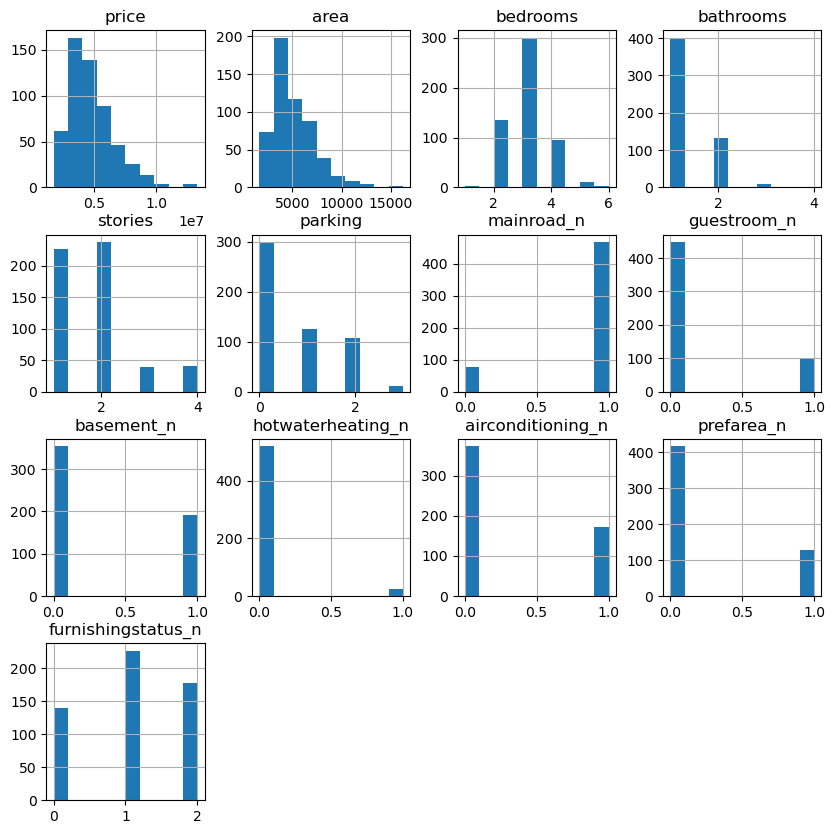

In [15]:
# Generate Histogram - It is a graphical representation of a grouped frequency distribution with continuous classes
df.hist(figsize=(10,10),bins=10)

<AxesSubplot:>

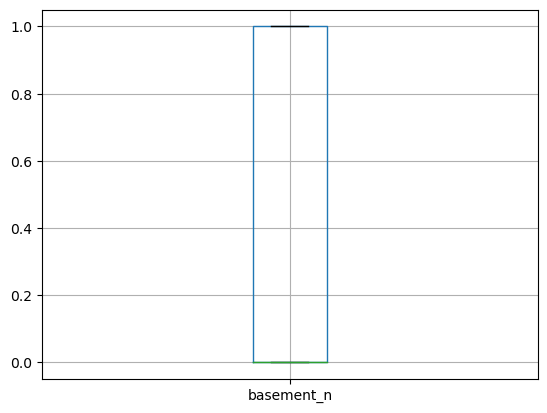

In [16]:
df.boxplot(column='basement_n')

<AxesSubplot:>

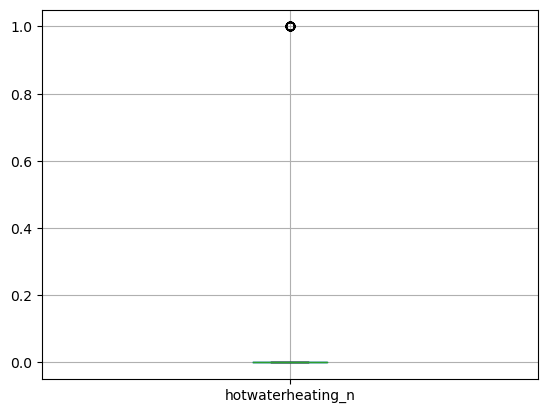

In [17]:
df.boxplot(column='hotwaterheating_n')

<AxesSubplot:>

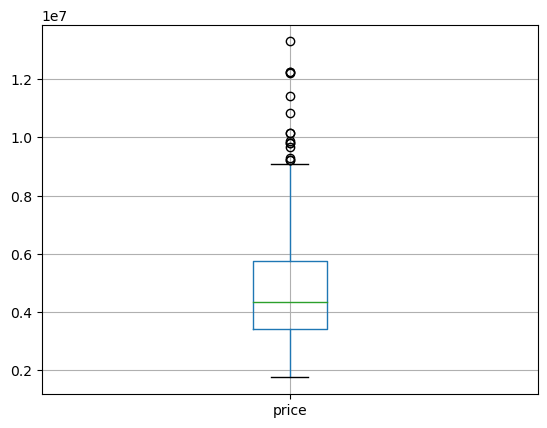

In [18]:
df.boxplot(column='price')

<AxesSubplot:>

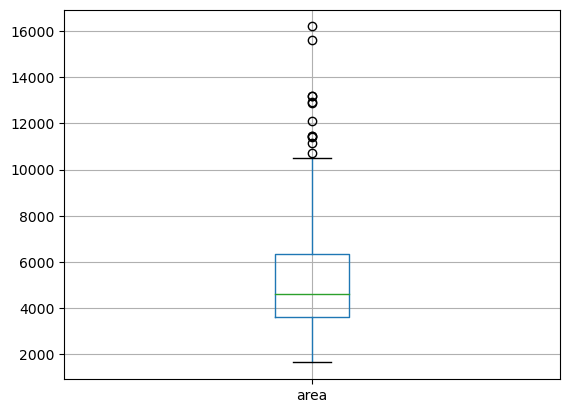

In [19]:
df.boxplot(column='area')

<AxesSubplot:>

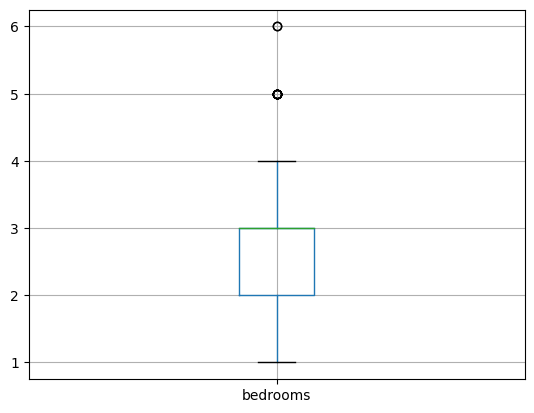

In [20]:
df.boxplot(column='bedrooms')

<AxesSubplot:>

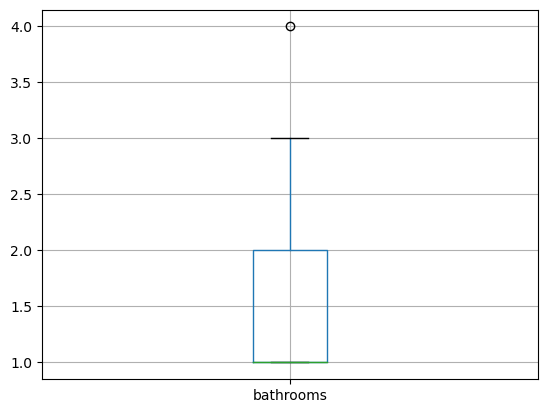

In [21]:
df.boxplot(column='bathrooms')

<AxesSubplot:>

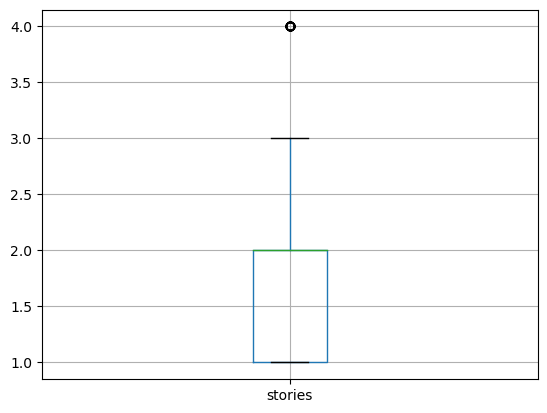

In [22]:
df.boxplot(column='stories')

<AxesSubplot:>

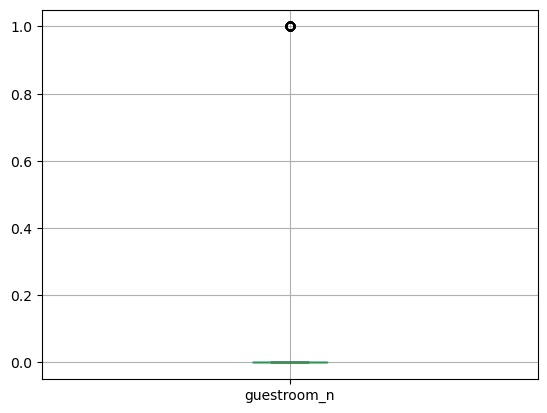

In [23]:
df.boxplot(column='guestroom_n')

<AxesSubplot:>

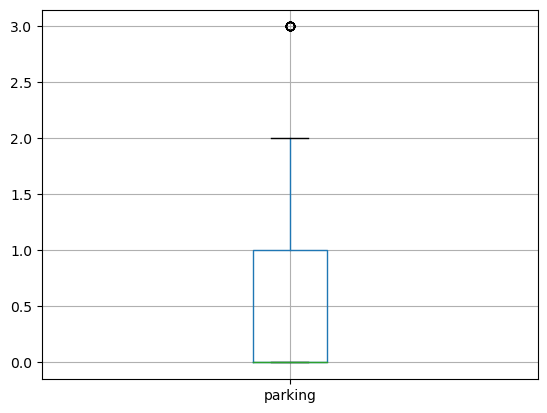

In [24]:
df.boxplot(column='parking')

<AxesSubplot:>

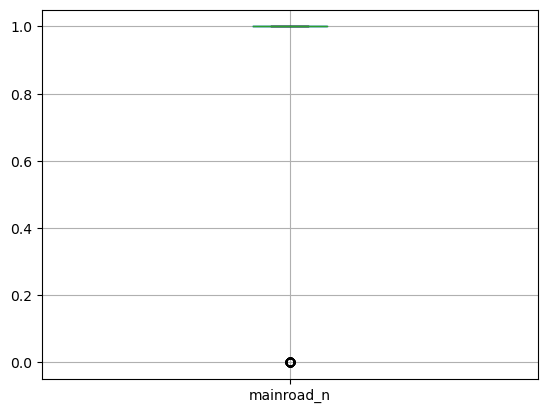

In [25]:
df.boxplot(column='mainroad_n')

<AxesSubplot:>

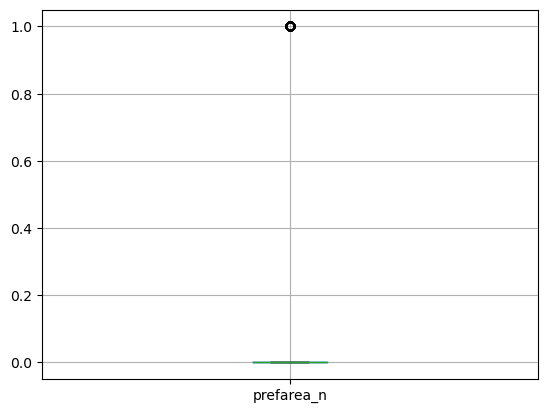

In [26]:
df.boxplot(column='prefarea_n')

<AxesSubplot:>

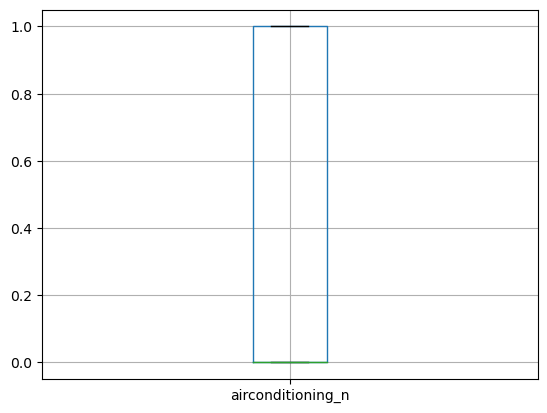

In [27]:
df.boxplot(column='airconditioning_n')

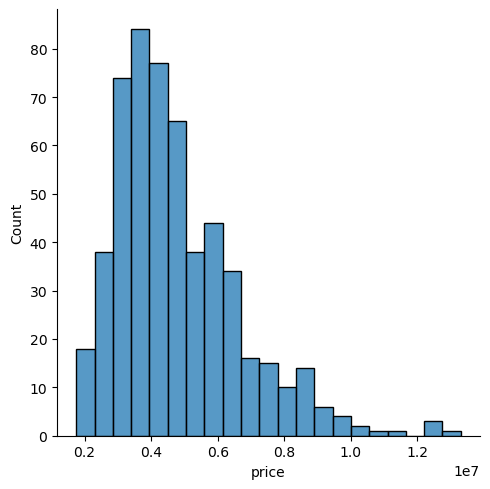

In [28]:
sns.displot(df['price'].dropna())

<AxesSubplot:xlabel='area', ylabel='Density'>

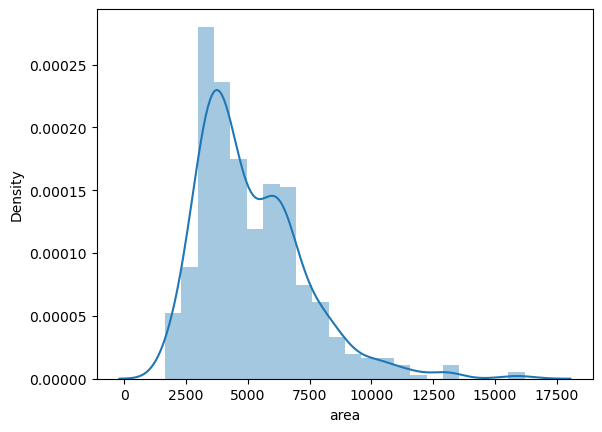

In [29]:
sns.distplot(df['area'].dropna())

<AxesSubplot:xlabel='bedrooms', ylabel='Density'>

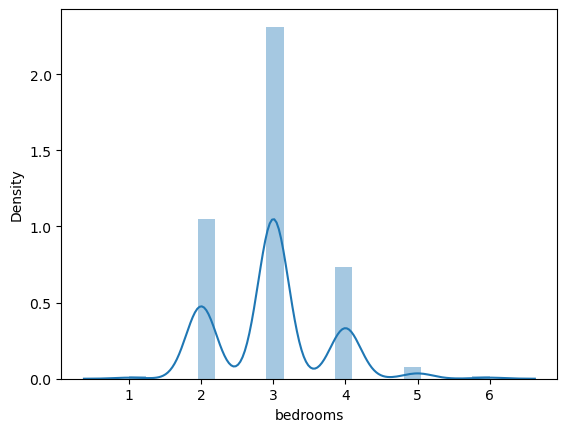

In [30]:
sns.distplot(df['bedrooms'].dropna())

<AxesSubplot:xlabel='bathrooms', ylabel='Density'>

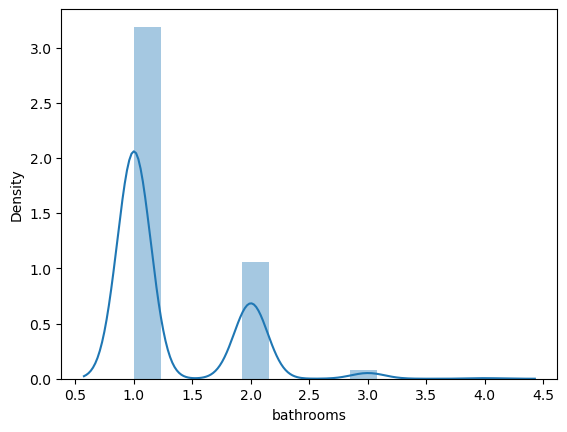

In [31]:
sns.distplot(df['bathrooms'].dropna())

<AxesSubplot:xlabel='stories', ylabel='Density'>

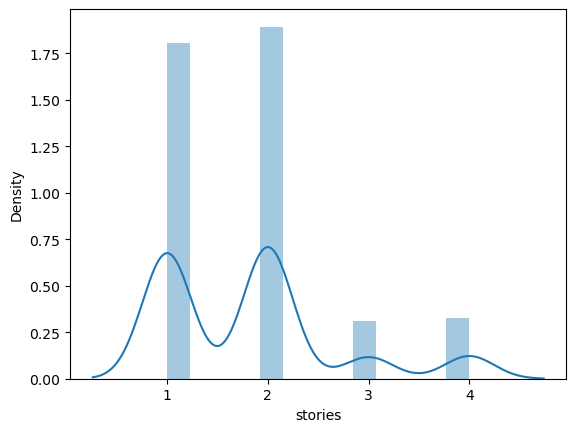

In [32]:
sns.distplot(df['stories'].dropna())

<AxesSubplot:xlabel='parking', ylabel='Density'>

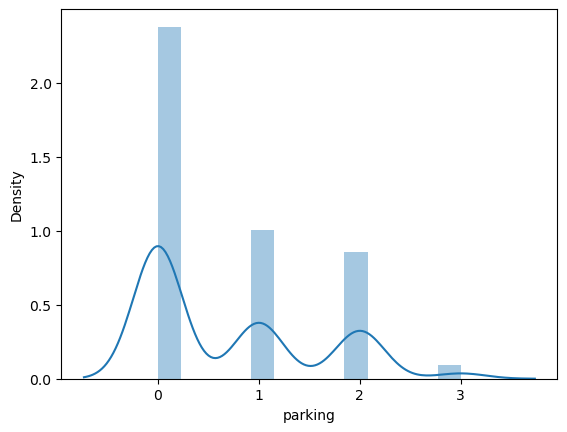

In [33]:
sns.distplot(df['parking'].dropna())

<AxesSubplot:xlabel='mainroad_n', ylabel='Density'>

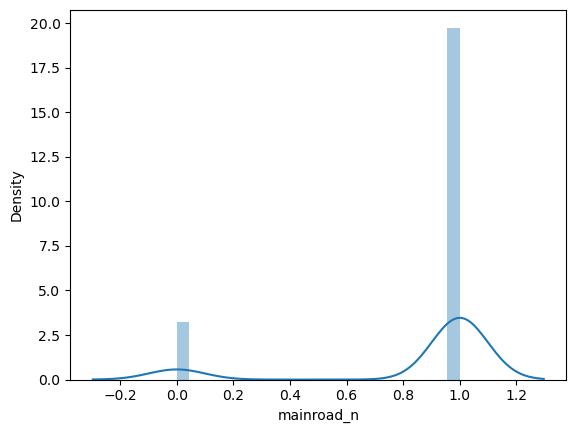

In [34]:
sns.distplot(df['mainroad_n'].dropna())

<AxesSubplot:xlabel='airconditioning_n', ylabel='Density'>

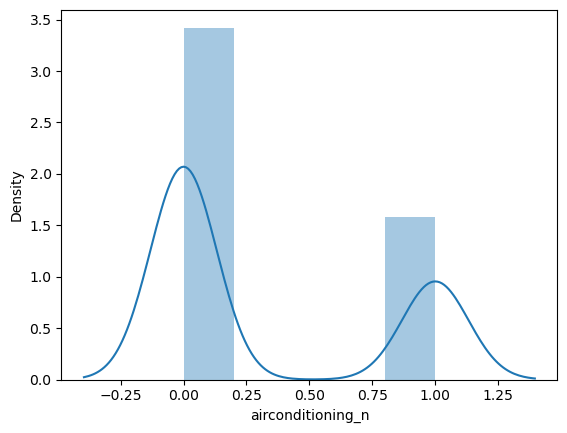

In [35]:
sns.distplot(df['airconditioning_n'].dropna())

5. Feature Selection

In [36]:
corr = df.corr(method='pearson',min_periods=1).round(2)
corr.style.background_gradient(cmap='coolwarm')

,price,area,bedrooms,bathrooms,stories,parking,mainroad_n,guestroom_n,basement_n,hotwaterheating_n,airconditioning_n,prefarea_n,furnishingstatus_n
price,1.000000,0.540000,0.370000,0.520000,0.420000,0.380000,0.300000,0.260000,0.190000,0.090000,0.450000,0.330000,-0.300000
area,0.540000,1.000000,0.150000,0.190000,0.080000,0.350000,0.290000,0.140000,0.050000,-0.010000,0.220000,0.230000,-0.170000
bedrooms,0.370000,0.150000,1.000000,0.370000,0.410000,0.140000,-0.010000,0.080000,0.100000,0.050000,0.160000,0.080000,-0.120000
bathrooms,0.520000,0.190000,0.370000,1.000000,0.330000,0.180000,0.040000,0.130000,0.100000,0.070000,0.190000,0.060000,-0.140000
stories,0.420000,0.080000,0.410000,0.330000,1.000000,0.050000,0.120000,0.040000,-0.170000,0.020000,0.290000,0.040000,-0.100000
parking,0.380000,0.350000,0.140000,0.180000,0.050000,1.000000,0.200000,0.040000,0.050000,0.070000,0.160000,0.090000,-0.180000
mainroad_n,0.300000,0.290000,-0.010000,0.040000,0.120000,0.200000,1.000000,0.090000,0.040000,-0.010000,0.110000,0.200000,-0.160000
guestroom_n,0.260000,0.140000,0.080000,0.130000,0.040000,0.040000,0.090000,1.000000,0.370000,-0.010000,0.140000,0.160000,-0.120000
basement_n,0.190000,0.050000,0.100000,0.100000,-0.170000,0.050000,0.040000,0.370000,1.000000,0.000000,0.050000,0.230000,-0.110000
hotwaterheating_n,0.090000,-0.010000,0.050000,0.070000,0.020000,0.070000,-0.010000,-0.010000,0.000000,1.000000,-0.130000,-0.060000,-0.030000


In [37]:
upper_boundary=df['price'].mean()+3*df['price'].std()
lower_boundary=df['price'].mean()-3*df['price'].std()
print(lower_boundary),print(upper_boundary)

-844589.5992657607
10378048.094678603


(None, None)

In [38]:
upper_boundary1=df['area'].mean()+3*df['area'].std()
lower_boundary1=df['area'].mean()-3*df['area'].std()
print(lower_boundary1),print(upper_boundary1)

-1359.8817831227389
11660.964351930079


(None, None)

In [39]:
upper_boundary2=df['bedrooms'].mean()+3*df['bedrooms'].std()
lower_boundary2=df['bedrooms'].mean()-3*df['bedrooms'].std()
print(lower_boundary2),print(upper_boundary2)

0.7509460329731743
5.179329196384624


(None, None)

In [40]:
IQR= df['bathrooms'].quantile(0.75) - df['bathrooms'].quantile(0.25)
IQR

1.0

In [41]:
## Calculating the boundaries
lower_bridge= df['bathrooms'].quantile(0.25)-(IQR*1.5)
upper_bridge= df['bathrooms'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)


-0.5
3.5


(None, None)

In [42]:
IQR1= df['stories'].quantile(0.75) - df['stories'].quantile(0.25)
IQR1

1.0

In [43]:
## Calculating the boundaries
lower_bridge1= df['stories'].quantile(0.25)-(IQR1*1.5)
upper_bridge1= df['stories'].quantile(0.75)+(IQR1*1.5)
print(lower_bridge1), print(upper_bridge1)


-0.5
3.5


(None, None)

In [44]:
IQR2= df['parking'].quantile(0.75) - df['parking'].quantile(0.25)
IQR2

1.0

In [45]:
## Calculating the boundaries
lower_bridge2= df['parking'].quantile(0.25)-(IQR2*1.5)
upper_bridge2= df['parking'].quantile(0.75)+(IQR2*1.5)
print(lower_bridge2), print(upper_bridge2)


-1.5
2.5


(None, None)

In [46]:
IQR3= df['mainroad_n'].quantile(0.75) - df['mainroad_n'].quantile(0.25)
IQR3

0.0

In [47]:
## Calculating the boundaries
lower_bridge3= df['mainroad_n'].quantile(0.25)-(IQR3*1.5)
upper_bridge3= df['mainroad_n'].quantile(0.75)+(IQR3*1.5)
print(lower_bridge3), print(upper_bridge3)


1.0
1.0


(None, None)

In [48]:
IQR4= df['guestroom_n'].quantile(0.75) - df['guestroom_n'].quantile(0.25)
IQR4

0.0

In [49]:
## Calculating the boundaries
lower_bridge4= df['guestroom_n'].quantile(0.25)-(IQR4*1.5)
upper_bridge4= df['guestroom_n'].quantile(0.75)+(IQR4*1.5)
print(lower_bridge4), print(upper_bridge4)


0.0
0.0


(None, None)

In [50]:
IQR5= df['prefarea_n'].quantile(0.75) - df['prefarea_n'].quantile(0.25)
IQR5

0.0

In [51]:
## Calculating the boundaries
lower_bridge5= df['prefarea_n'].quantile(0.25)-(IQR5*1.5)
upper_bridge5= df['prefarea_n'].quantile(0.75)+(IQR5*1.5)
print(lower_bridge5), print(upper_bridge5)


0.0
0.0


(None, None)

In [52]:
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_n,guestroom_n,basement_n,hotwaterheating_n,airconditioning_n,prefarea_n,furnishingstatus_n
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [53]:
df.shape

(545, 13)

In [54]:
df.loc[df['price']>=10378048,'price']=10378048
df.loc[df['area']>=11660,'area']=11660
df.loc[df['bedrooms']>=5,'bedrooms']=5
df.loc[df['bathrooms']>=3,'bathrooms']=3
df.loc[df['stories']>=3,'stories']=3
df.loc[df['parking']>=2,'parking']=2
df.loc[df['mainroad_n']>=1,'mainroad_n']=1



In [55]:
#predicting dependent and independent variables and assigning x & y to them
X=df.drop(['price'],axis='columns')
Y=df['price']

In [56]:
X

,area,bedrooms,bathrooms,stories,parking,mainroad_n,guestroom_n,basement_n,hotwaterheating_n,airconditioning_n,prefarea_n,furnishingstatus_n
0,7420,4,2,3,2,1,0,0,0,1,1,0
1,8960,4,3,3,2,1,0,0,0,1,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,1
3,7500,4,2,2,2,1,0,1,0,1,1,0
4,7420,4,1,2,2,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,1,0,1,0,0,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,0,1,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [57]:
Y

0      10378048
1      10378048
2      10378048
3      10378048
4      10378048
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [58]:
# Splitting the dataset into 80% training data and 20% testing data.
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [59]:
X_train.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_n,guestroom_n,basement_n,hotwaterheating_n,airconditioning_n,prefarea_n,furnishingstatus_n
175,9800,4,2,2,2,1,1,0,0,0,0,1
25,6540,4,2,2,2,1,1,1,0,1,1,0
253,3520,2,1,2,0,1,0,0,0,0,1,0
257,8250,3,1,1,0,1,0,0,0,0,0,0
431,3180,4,1,2,0,1,0,1,0,1,0,2


In [60]:
Y_train.head()

175    5250000
25     8540000
253    4515000
257    4480000
431    3290000
Name: price, dtype: int64

6. Model Selection and Evaluation

A. Linear Regression

In [61]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [62]:
y_pred=lr.predict(X_test)

In [63]:
from sklearn.metrics import r2_score

In [64]:
r2_score(Y_test,y_pred)

0.7173465725698999

In [65]:
lr.score(X_test,Y_test)

0.7173465725698999

B. Random Forest

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, Y_train)

y_pred = rf_model.predict(X_test)

print('Random Forest: ', r2_score(Y_test, y_pred))

Random Forest:  0.7114555637749351


C. DecisionTree

In [67]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

rf_model.fit(X_train, Y_train)
y_pred = rf_model.predict(X_test)

print('Decision Tree: ', r2_score(Y_test, y_pred))

Decision Tree:  0.7114555637749351


Model Evaluation

In [68]:
preds = lr.predict([[9960,3,2,2,2,1,0,1,0,0,1,1]]).round(2)
preds

array([7641706.56])

7. Create Pickle file

In [69]:
import pickle

# save the model
import pickle
pickle.dump(lr, open("1024.pkl", "wb"))